In [0]:
#imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [0]:
data= pd.read_csv('heart.csv')


#Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
import matplotlib.pyplot as plt
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
sex,-0.0984466,1,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
cp,-0.068653,-0.0493529,1,0.0476078,-0.0769044,0.094444,0.0444206,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.0567688,0.0476078,1,0.123174,0.177531,-0.114103,-0.0466977,0.0676161,0.193216,-0.121475,0.101389,0.0622099,-0.144931
chol,0.213678,-0.197912,-0.0769044,0.123174,1,0.0132936,-0.15104,-0.00993984,0.0670228,0.0539519,-0.00403777,0.0705109,0.098803,-0.0852391
fbs,0.121308,0.0450318,0.094444,0.177531,0.0132936,1,-0.0841891,-0.00856711,0.0256651,0.00574722,-0.0598942,0.137979,-0.0320193,-0.0280458
restecg,-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1,0.0441234,-0.0707329,-0.0587702,0.0930448,-0.0720424,-0.0119814,0.13723
thalach,-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
exang,0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.0960929,-0.14923,0.193216,0.0539519,0.00574722,-0.0587702,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696


In [0]:
features_all=data.iloc[:,:-1].values
label_all=data.iloc[:,-1].values
x_traina, x_testa, y_traina, y_testa= train_test_split(features_all, label_all, test_size=0.2, shuffle=True, random_state=0)

In [0]:
n_data= data.drop(columns=['trestbps', 'chol','fbs','restecg'])

In [0]:
corr = n_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0984466,-0.068653,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
sex,-0.0984466,1,-0.0493529,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
cp,-0.068653,-0.0493529,1,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
thalach,-0.398522,-0.0440199,0.295762,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
exang,0.0968008,0.141664,-0.39428,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.0960929,-0.14923,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,-0.0307106,0.119717,0.386784,-0.257748,-0.577537,1,-0.0801552,-0.104764,0.345877
ca,0.276326,0.118261,-0.181053,-0.213177,0.115739,0.222682,-0.0801552,1,0.151832,-0.391724
thal,0.0680014,0.210041,-0.161736,-0.0964391,0.206754,0.210244,-0.104764,0.151832,1,-0.344029
target,-0.225439,-0.280937,0.433798,0.421741,-0.436757,-0.430696,0.345877,-0.391724,-0.344029,1


In [0]:
features=n_data.iloc[:,:-1].values
label=n_data.iloc[:,-1].values

In [0]:
x_train, x_test, y_train, y_test= train_test_split(features, label, test_size=0.2, shuffle=True, random_state=0)

In [0]:
ssc = StandardScaler() 
x_train = ssc.fit_transform(x_train) 
x_test = ssc.transform(x_test)

#Decision Tree Model

In [0]:
hd_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, min_samples_leaf = 5 ,random_state = 0)
hd_tree.fit(x_train, y_train)
hd_pred = hd_tree.predict(x_test)
print('Accuracy score : ', accuracy_score(y_test, hd_pred)*100)

Accuracy score :  81.9672131147541


In [0]:
hd_gtree = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, min_samples_leaf = 5, random_state = 0)
hd_gtree.fit(x_train, y_train)
hd_gpred = hd_gtree.predict(x_test)
print('Accuracy score : ', accuracy_score(y_test, hd_gpred)*100)

Accuracy score :  81.9672131147541


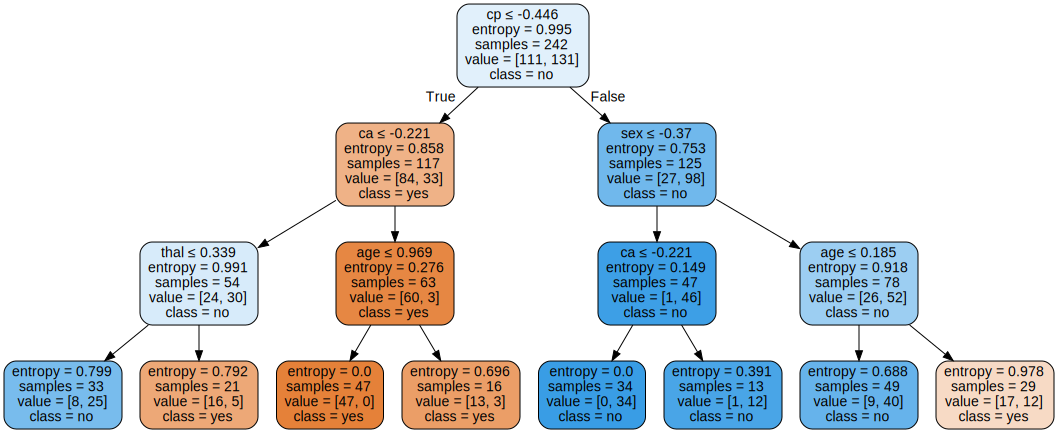

In [0]:

import graphviz
features_d = n_data.iloc[:, :-1]
label_d = n_data.iloc[:, -1]
dot_data = tree.export_graphviz(hd_tree, out_file=None, 
                         feature_names = features_d.columns,  
                         class_names = ["yes","no"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

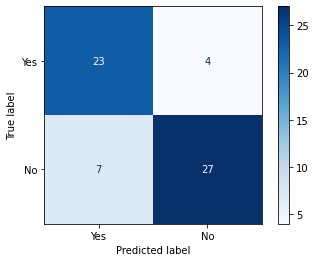

In [0]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(hd_tree, x_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [0]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = hd_tree, X = features, y = label, cv = 35)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.69841% (11.70225%)


In [0]:
x_trains, x_tests, y_trains, y_tests= train_test_split(features, label, test_size=0.35, shuffle=True, random_state=0)

In [0]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
results = cross_val_score(estimator = hd_tree, X = x_train, y = y_train, cv = loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.273% (41.907%)


In [0]:
# Pick a Classifier you are searching for its best Paramters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [
              {'C': [1, 10 , 100], 
               'kernel': ['linear']},
              
              {'C': [1, 10,100],
               'kernel': ['rbf'], 
               'gamma': [0.1,0.25, 0.2 , 0.3]}
              ]


grid_search = GridSearchCV(estimator = classifier,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = 3)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 
grid_search = grid_search.fit(x_train, y_train)

print("best accuracy is :" , grid_search.best_score_*100)
grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 84.33333333333334


{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [0]:
classifier = SVC(kernel ='rbf',C=1,gamma=0.2)
classifier.fit(x_train,y_train)
y_pr=classifier.predict(x_test)
accuracy_score(y_test, y_pr)*100

83.60655737704919

In [0]:
rid_search = grid_search.fit(x_traina, y_traina)

print("best accuracy is :" , grid_search.best_score_*100)
grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 81.03333333333333


{'C': 100, 'kernel': 'linear'}

In [0]:
classifiera = SVC(kernel ='linear',C=100)
classifiera.fit(x_traina,y_traina)
y_pra=classifiera.predict(x_testa)
accuracy_score(y_testa, y_pra)*100

85.24590163934425

#Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier 
clf= GradientBoostingClassifier(n_estimators=5, learning_rate=1.0,max_depth=3)
clf.fit(x_train,y_train)
pred_g= clf.predict(x_test)
accuracy_score(y_test, pred_g)*100

83.60655737704919

In [0]:
clf= GradientBoostingClassifier(n_estimators=40, learning_rate=1.0,max_depth=5)
clf.fit(x_traina,y_traina)
pred_ga= clf.predict(x_testa)
accuracy_score(y_testa, pred_ga)*100

80.32786885245902

In [0]:
clfs= GradientBoostingClassifier(n_estimators=40, learning_rate=1.0,max_depth=5)
clfs.fit(x_trains,y_trains)
pred_gs= clfs.predict(x_tests)
accuracy_score(y_tests, pred_gs)*100

78.50467289719626